In [8]:
with open('common.py') as fin:
  msg = fin.read()

In [9]:
print(msg)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn here because otherwise it will mess up warnings
import seaborn as sns
import warnings
import logging

# https://github.com/tensorflow/tensorflow/issues/8340#issuecomment-332212742
# disabling tensorflow warnings, feel free to uncomment out the next 2 lines if you want to suppress warnings
# logging.getLogger("tensorflow").disabled = True
# warnings.simplefilter("ignore")

pd.set_option("display.max_rows", 13)
pd.set_option('display.max_columns', 8)
pd.set_option("display.latex.repr", False)
pd.set_option('max_colwidth', 30)



In [10]:
exec(msg)

In [12]:
with open('matplotlibconf.py') as fin:
    exec(fin.read())

In [13]:
df = pd.read_csv('./data/weight-height.csv')

In [14]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


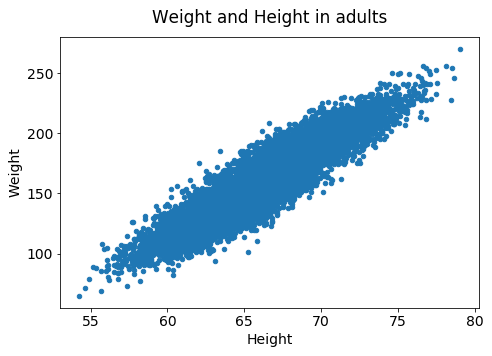

In [15]:
def plot_humans():
    df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plot_humans()

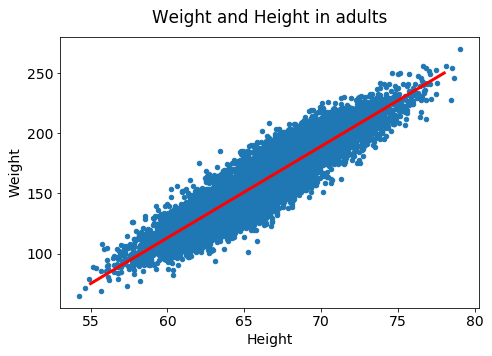

In [17]:
plot_humans()
# Here we plot the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3);

In [18]:
def line(x, w=0, b=0):
    return x * w + b

In [19]:
x = np.linspace(55, 80, 101)
x

array([55.  , 55.25, 55.5 , 55.75, 56.  , 56.25, 56.5 , 56.75, 57.  ,
       57.25, 57.5 , 57.75, 58.  , 58.25, 58.5 , 58.75, 59.  , 59.25,
       59.5 , 59.75, 60.  , 60.25, 60.5 , 60.75, 61.  , 61.25, 61.5 ,
       61.75, 62.  , 62.25, 62.5 , 62.75, 63.  , 63.25, 63.5 , 63.75,
       64.  , 64.25, 64.5 , 64.75, 65.  , 65.25, 65.5 , 65.75, 66.  ,
       66.25, 66.5 , 66.75, 67.  , 67.25, 67.5 , 67.75, 68.  , 68.25,
       68.5 , 68.75, 69.  , 69.25, 69.5 , 69.75, 70.  , 70.25, 70.5 ,
       70.75, 71.  , 71.25, 71.5 , 71.75, 72.  , 72.25, 72.5 , 72.75,
       73.  , 73.25, 73.5 , 73.75, 74.  , 74.25, 74.5 , 74.75, 75.  ,
       75.25, 75.5 , 75.75, 76.  , 76.25, 76.5 , 76.75, 77.  , 77.25,
       77.5 , 77.75, 78.  , 78.25, 78.5 , 78.75, 79.  , 79.25, 79.5 ,
       79.75, 80.  ])

In [20]:
yhat = line(x, w=0, b=0)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

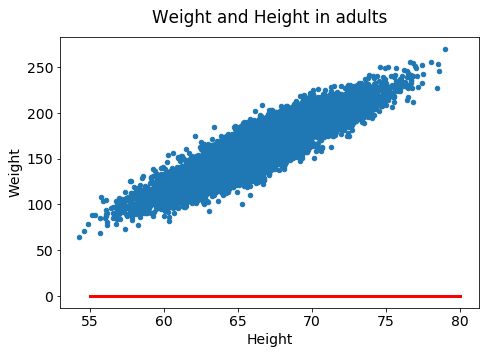

In [21]:
plot_humans()
plt.plot(x, yhat, color='red', linewidth=3);

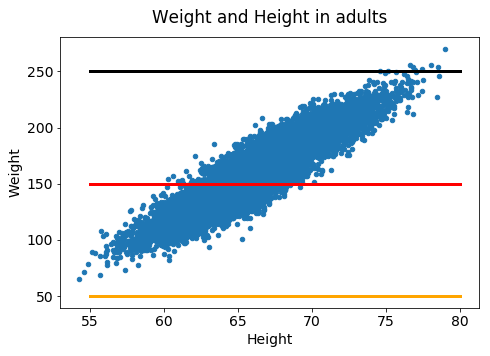

In [22]:
plot_humans()
# three settings for b "offset" the
plt.plot(x, line(x, b=50), color='orange', linewidth=3)
plt.plot(x, line(x, b=150), color='red', linewidth=3)
plt.plot(x, line(x, b=250), color='black', linewidth=3);

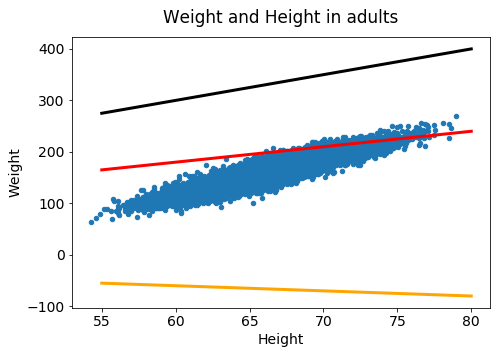

In [24]:
plot_humans()
plt.plot(x, line(x, w=5), color='black', linewidth=3)
plt.plot(x, line(x, w=3), color='red', linewidth=3)
plt.plot(x, line(x, w=-1), color='orange', linewidth=3);

In [26]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()